In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Figure size
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 140

In [4]:
#Loading temperture data

filename = r'C:\Users\13134\Desktop\DataVisualization\Time Series Plot/daily-temperature.csv'

daily_temp = pd.read_csv(filename)

daily_temp

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [5]:
daily_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [7]:
#Covert Date to datetime format

daily_temp['Date'] = pd.to_datetime(daily_temp['Date'])

In [8]:
daily_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3650 non-null   datetime64[ns]
 1   Temp    3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [9]:
#Reset the index to the Date

daily_temp.set_index('Date', inplace=True)

daily_temp.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


**Line and Scatter Plot**


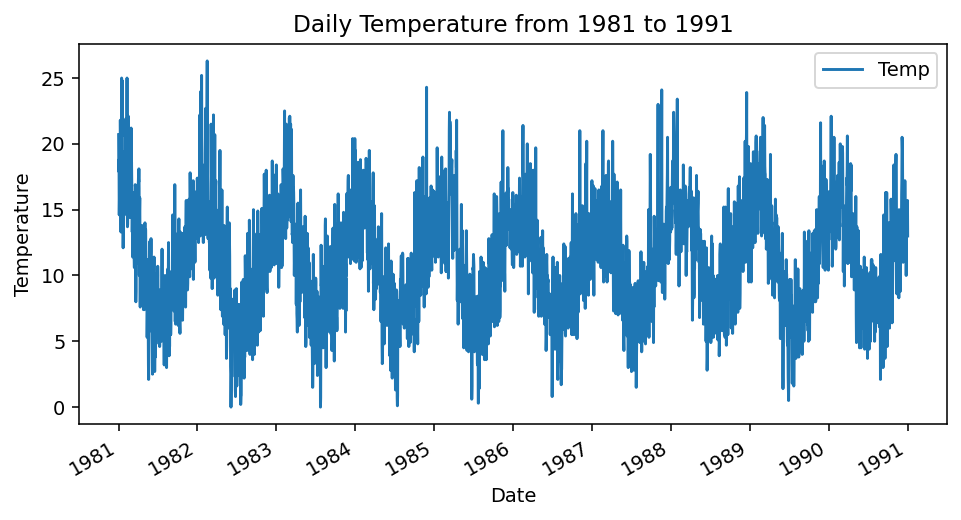

In [12]:
#Line Plot

daily_temp.plot()
plt.ylabel('Temperature')
plt.title('Daily Temperature from 1981 to 1991')
plt.show()

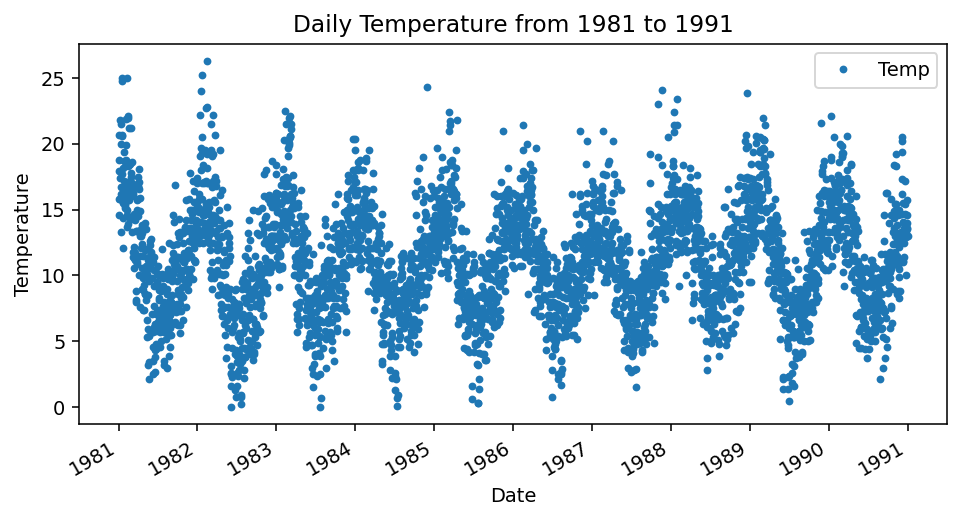

In [13]:
#Scatter Plot

daily_temp.plot(style = '.')
plt.ylabel('Temperature')
plt.title('Daily Temperature from 1981 to 1991')
plt.show()

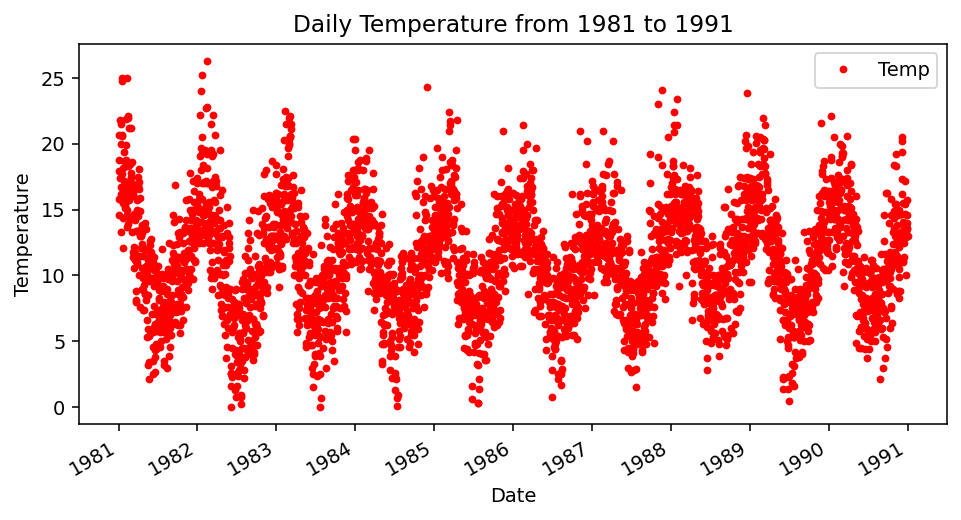

In [14]:
#We can change the color from blue to red
#Scatter Plot

daily_temp.plot(style = '.', color='red')
plt.ylabel('Temperature')
plt.title('Daily Temperature from 1981 to 1991')
plt.show()

**Subplots**

In [15]:
#Grouping the temperatures by years

groups = daily_temp.groupby(pd.Grouper(freq = 'A'))

In [16]:
keys = groups.groups.keys()
keys

dict_keys([Timestamp('1981-12-31 00:00:00', freq='A-DEC'), Timestamp('1982-12-31 00:00:00', freq='A-DEC'), Timestamp('1983-12-31 00:00:00', freq='A-DEC'), Timestamp('1984-12-31 00:00:00', freq='A-DEC'), Timestamp('1985-12-31 00:00:00', freq='A-DEC'), Timestamp('1986-12-31 00:00:00', freq='A-DEC'), Timestamp('1987-12-31 00:00:00', freq='A-DEC'), Timestamp('1988-12-31 00:00:00', freq='A-DEC'), Timestamp('1989-12-31 00:00:00', freq='A-DEC'), Timestamp('1990-12-31 00:00:00', freq='A-DEC')])

In [17]:
# Using the for loop

for key in keys:
    print(key)

1981-12-31 00:00:00
1982-12-31 00:00:00
1983-12-31 00:00:00
1984-12-31 00:00:00
1985-12-31 00:00:00
1986-12-31 00:00:00
1987-12-31 00:00:00
1988-12-31 00:00:00
1989-12-31 00:00:00
1990-12-31 00:00:00


In [20]:
#create a dataframe and group the temps into separate years

years = pd.DataFrame()
for key in keys:
    years[key] = groups.get_group(key)['Temp'].values

In [21]:
years

,1981-12-31,1982-12-31,1983-12-31,1984-12-31,1985-12-31,1986-12-31,1987-12-31,1988-12-31,1989-12-31,1990-12-31
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


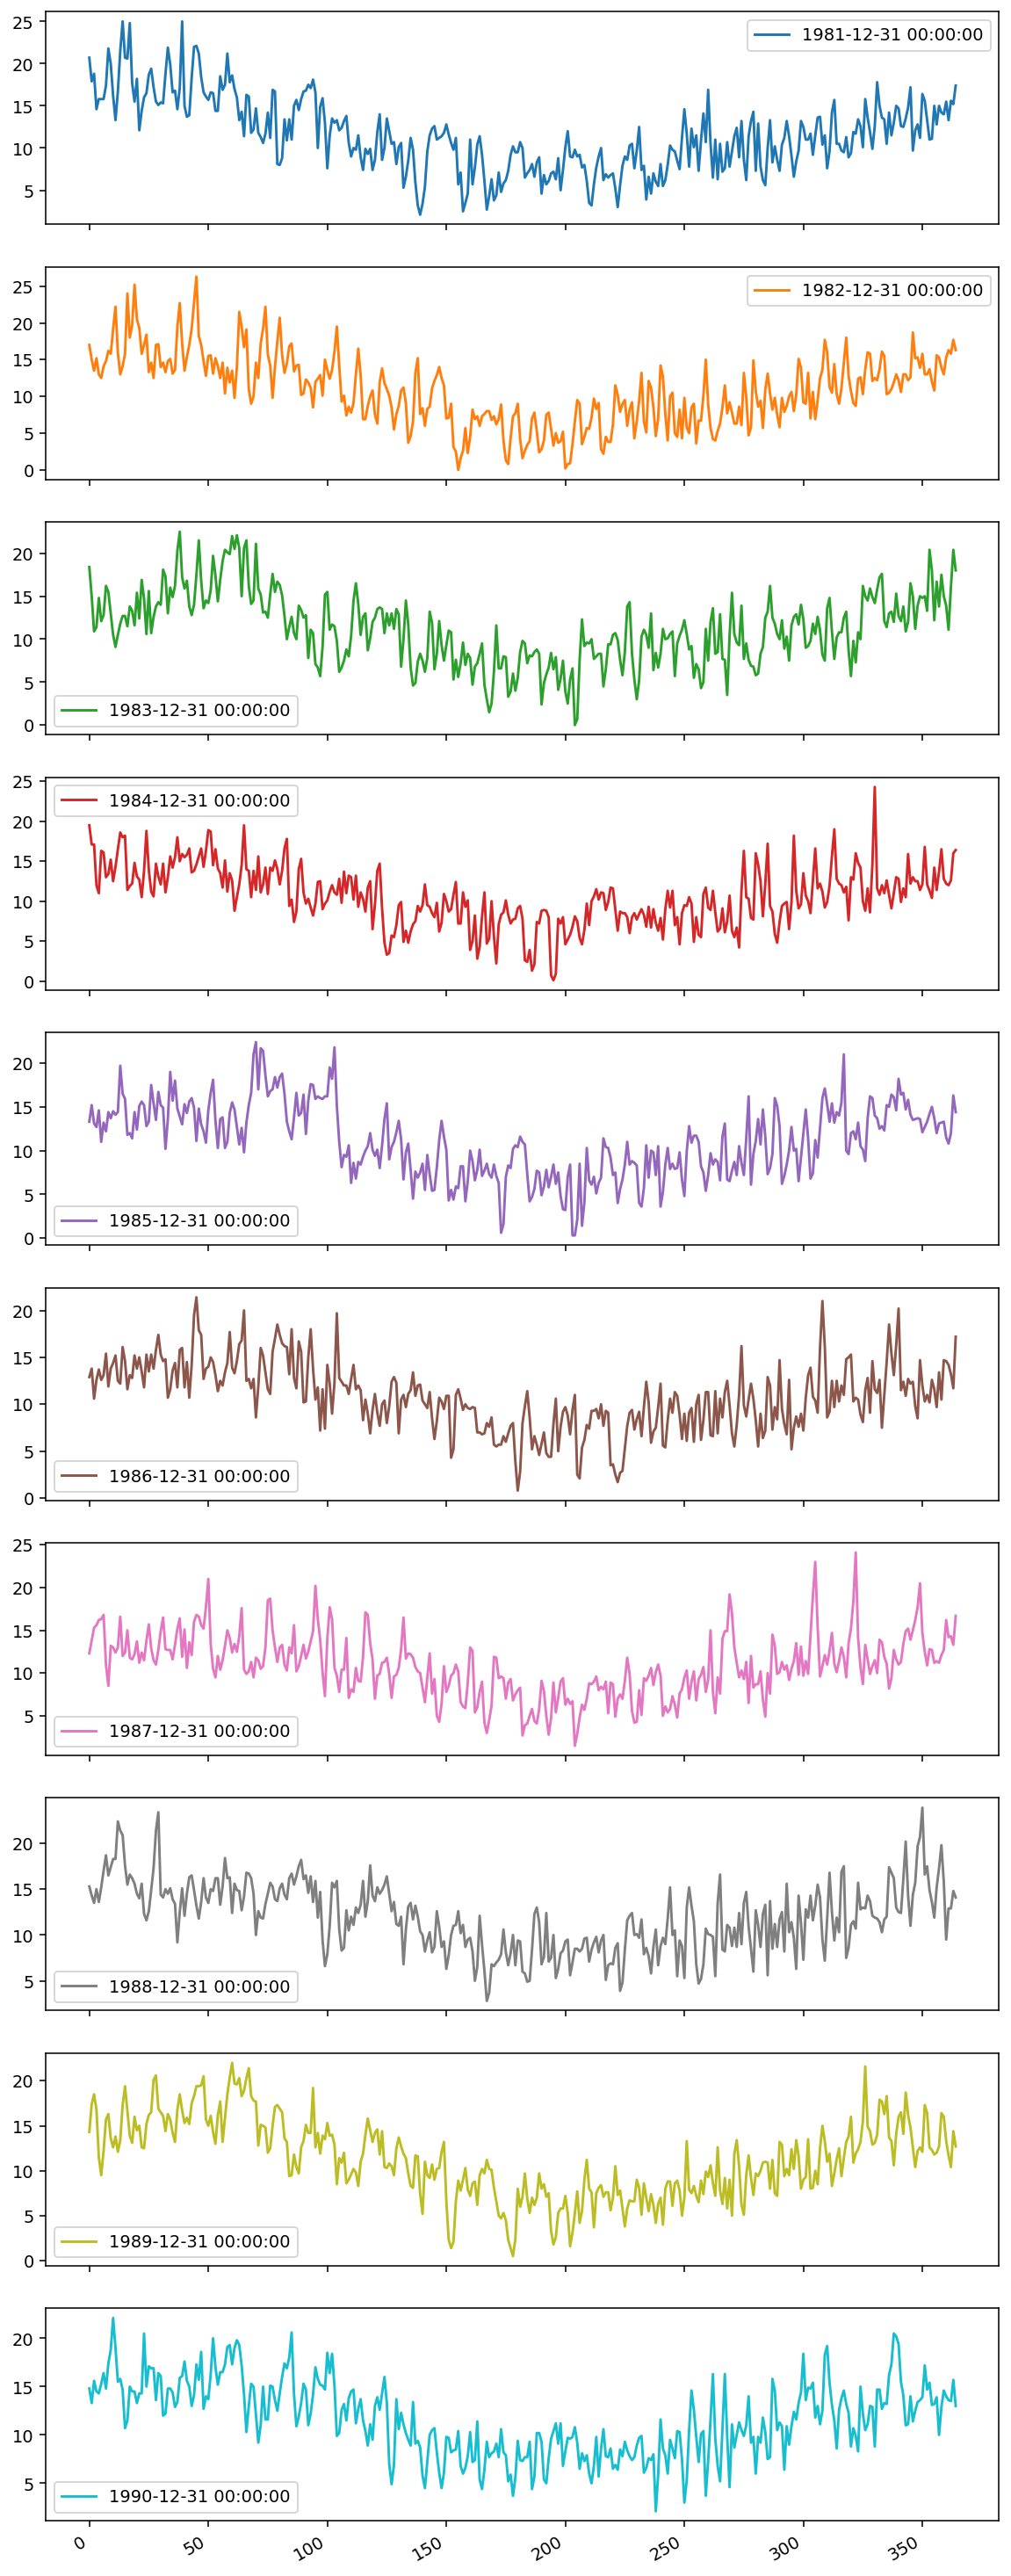

<Figure size 1120x560 with 0 Axes>

In [22]:
years.plot(subplots = True, figsize = (10, 30))
plt.show()
plt.tight_layout()

# HEATMAP

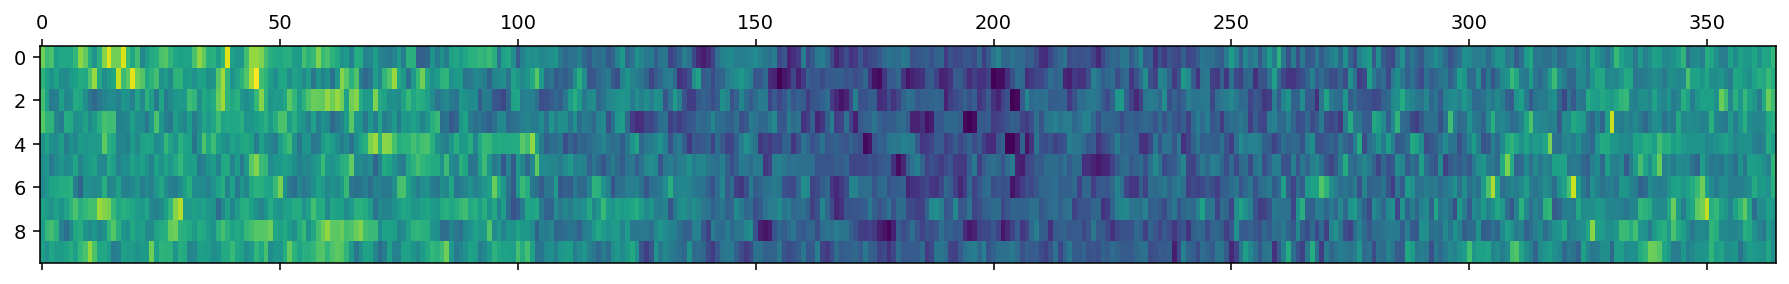

In [23]:
#heatmap of the temparature data grouped by years

plt.matshow(years.T, aspect = "auto")
plt.show()

# HISTOGRAM AND KERNEL DENSITY ESTIMATE (KDE) PLOT

In [24]:
daily_temp

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


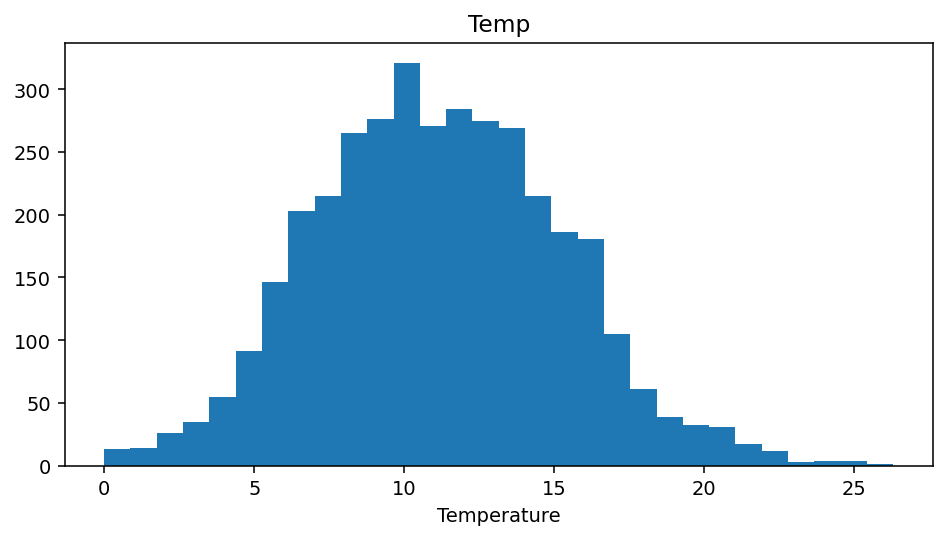

In [29]:
# Histogram

daily_temp.hist(bins = 30, grid = False)
plt.xlabel('Temperature')
plt.show()

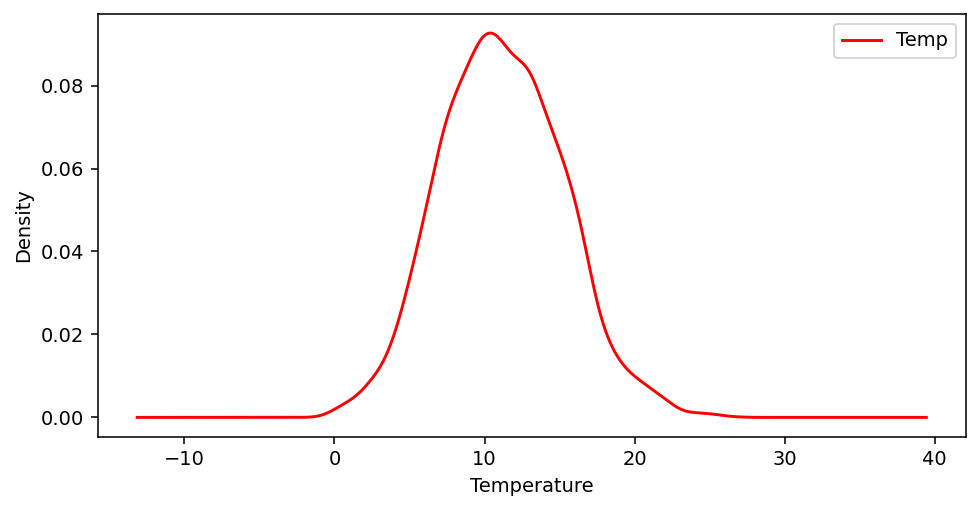

In [30]:
#KDE plot
daily_temp.plot(kind = 'kde', color = 'red')
plt.xlabel('Temperature')
plt.show()